<a href="https://colab.research.google.com/github/MirandaCR/TEC/blob/main/Avance1_%26_2_Equipo20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




<div align="left">
  <img src="https://brandemia.org/sites/default/files/sites/default/files/tec_monterrey_nuevo_logo.png" width="500" height="300">
</div>

# **Proyecto Integrador**


## Integrantes:
 <ul>
      <li>Alfonso Garibay</li>
      <li>Cristian Miranda</li>
       <li>Jaik Yocks</li>
 </ul>


# **Descripción del Proyecto**

En este trabajo, se presenta información de distintas iniciativas de un banco para el 2024. Lo que se busca es implementar un algoritmo que permita realizar un ranking de iniciativas a partir de distintas visiones de datos para poder generar una propuesta de portafolio de valor en base a restricciones presupuestarias que maximizen la utilidad del ente financiero.

## **Modulos**

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## **Carga de Datos**

Se inicia con la carga de los datos que se encuentran en un repositorio en Github

In [ ]:
url = "https://github.com/MirandaCR/TEC/raw/main/Proyecto%20Final/Dataset.xlsx"

df = pd.read_excel(url)
df.rename(columns={"Columna1":"Tipo"},inplace=True)
df.head()

,Visión,GRAN APUESTA,OBJETIVO ESTRATÉGICO,INICIATIVA,Ejecutor(es),FTEs,CAPEX,Impacto (Estimación del beneficio para los Objetivos Estratégicos),Tipo,Impacto Ingresos,Impacto Ahorros,Impacto Tiempo,Tiempo de Retorno,Fecha Inicio,Fecha Fin,Proyecto Activable,Tiempo,SELECCIONADO
0,Deuda Técnica,"Disminuir Deuda técnica de seguridad, tecnolog...",Interés Deuda Técnica,INI_01,Varias,6.0,49490100.0,NaN,SIN IMPACTO,NaN,NaN,NaN,3.0,NaT,NaT,NaN,NaN,Si
1,CoE Datos,Diseñar y habilitar ecosistemas de pagos y hab...,Ingreso no Financieros \n(Serv & Com / Ingreso...,INI_02,Empresas (Recursos),9.0,10797840.0,"Ingresos No Financieros 2,8 MM a 3 años.\nAño...",VAN,2800000.0,NaN,NaN,3.0,2024-01-01,2025-01-01,NaN,NaN,No
2,CoE Datos,Diseñar y habilitar ecosistemas de pagos y hab...,Ingreso no Financieros \n(Serv & Com / Ingreso...,INI_03,PYMES (Recursos),15.0,10697860.0,VAN: 11 MM a 5 años \nAño 0: 0 MM\nAño 1: 2....,VAN,11000000.0,NaN,NaN,5.0,2024-04-01,2025-01-01,NaN,NaN,No
3,Presupuesto de Proyecto,Cobranzas,Ratio Vencida,INI_04,Riesgo de Crédito,0.0,2999400.0,Caso,SIN IMPACTO,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,No
4,CoE Datos,Diseñar y habilitar ecosistemas de pagos y hab...,Participación de Mercado \n(Obligaciones con e...,INI_05,CoE Datos & Analítica| Segmentos y Negocios Di...,7.0,2519496.0,"2,5MM Ingresos Operacionales netos \nAño 1: 2...",INGRESO OPERACIONAL,2500000.0,NaN,NaN,3.0,2024-01-01,2024-09-01,NaN,NaN,No


## Estructura de datos
A continuación se procede a realizar la primer revisión de datos en cuanto a sus dimensiones y tipos

In [ ]:
print("Filas:", df.shape[0], "\nColumnas:",df.shape[1])

Filas: 97 
Columnas: 18


In [ ]:
pd.DataFrame(df.dtypes).rename({0:"Tipo"},axis="columns")

,Tipo
Visión,object
GRAN APUESTA,object
OBJETIVO ESTRATÉGICO,object
INICIATIVA,object
Ejecutor(es),object
FTEs,float64
CAPEX,float64
Impacto (Estimación del beneficio para los Objetivos Estratégicos),object
Tipo,object
Impacto Ingresos,float64


In [ ]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
FTEs,97.0,6.512887,0.0,0.0,2.0,10.0,42.0,9.564499
CAPEX,97.0,5644647.0025,0.0,0.0,0.0,8310337.6,49490100.0,10076829.329014
Impacto Ingresos,32.0,35346087.875,113850.0,953000.0,4150000.0,21150000.0,450000000.0,89122345.255051
Impacto Ahorros,9.0,9139377.777778,86400.0,568000.0,1700000.0,6000000.0,61300000.0,19765677.491157
Impacto Tiempo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tiempo de Retorno,35.0,2.571429,1.0,1.0,3.0,3.0,5.0,1.266903
Fecha Inicio,59,2023-12-11 02:50:50.847457536,2022-04-01 00:00:00,2024-01-01 00:00:00,2024-01-01 00:00:00,2024-03-01 00:00:00,2024-07-01 00:00:00,NaN
Fecha Fin,49,2024-10-23 07:50:12.244898048,2024-02-01 00:00:00,2024-09-01 00:00:00,2024-12-01 00:00:00,2024-12-31 00:00:00,2025-09-01 00:00:00,NaN


Se cuentan con 18 variables relacionadas a proyectos que se pueden resumir de la siguiente forma:

- Gran Apuesta: Relacionada a la estrategia del banco
- Objetivo Estratégico: Métrica a la que se apunta
- Iniciativa: Proyecto por ser aprobado-ejecutado
- Ejecutores: Equipos Involucrados en la iniciativa
- FTEs: Recursos (personas) necesarias para ejecutar la iniciativa
- CAPEX: Monto necesario de Inversión
- Impacto: Retorno que se espera de la iniciativa
- Tipo: Tipo de Impacto a recibir
- Impacto Ingresos: Cantidad de Ingresos en caso de que el impacto sea monetario
- Impacto Ahorros: Cantidad de ahorros USD en caso de que el impacto sea normativo o de eficiencia
- Impacto Tiempo: Tiempo a reducir en caso de que el impacto esté relacionado a reducir tiempos
- Tiempo de Retorno: Tiempo en años del retorno de la inversión
- Fecha Inicio: Fecha estimada de inicio del proyecto
- Fecha Fin: Fecha estimada del fin del proyecto
- Tiempo: Tiempo total de ejecución de la iniciativa
- Seleccionado: Variable que determina si el proyecto fue seleccionado

## Correción de Variables
Con lo anterior, es evidente que las fechas de los proyectos no esta completa por lo que se procede a completar esta información considerando que todos deben arrancar máximo el Q3 del año en curso y terminar 1 año posterior. Adicionalmente, se corrige la variable de tiempo de ejecución

In [ ]:
date_end = pd.to_datetime("01/06/2025")
date_start = pd.to_datetime("01/06/2024")
df["Fecha Inicio"] = df["Fecha Inicio"].fillna(date_start)
df["Fecha Fin"] = df["Fecha Fin"].fillna(date_end)
df["Tiempo"] = abs((df['Fecha Fin'] - df['Fecha Inicio']) // np.timedelta64(1, 'M')) + 1


## **Valores Faltantes**

Ahora, se procede a revisar valores faltantes del dataset para posteriormente darles tratamiento

In [ ]:
# Tabla de Nulos por variable
nulo = pd.DataFrame(df.isnull().sum()).rename({0:"Total"}, axis='columns')
nulo['Porcentaje'] = (nulo.Total*100/len(df)).round(2)
nulo.sort_values(by=['Total'], inplace=True, ascending=False)
nulo

,Total,Porcentaje
Impacto Tiempo,97,100.00
Proyecto Activable,91,93.81
Impacto Ahorros,88,90.72
Impacto Ingresos,65,67.01
Tiempo de Retorno,62,63.92
Impacto (Estimación del beneficio para los Objetivos Estratégicos),11,11.34
Tipo,7,7.22
OBJETIVO ESTRATÉGICO,4,4.12
Tiempo,0,0.00
Fecha Fin,0,0.00


<Axes: >

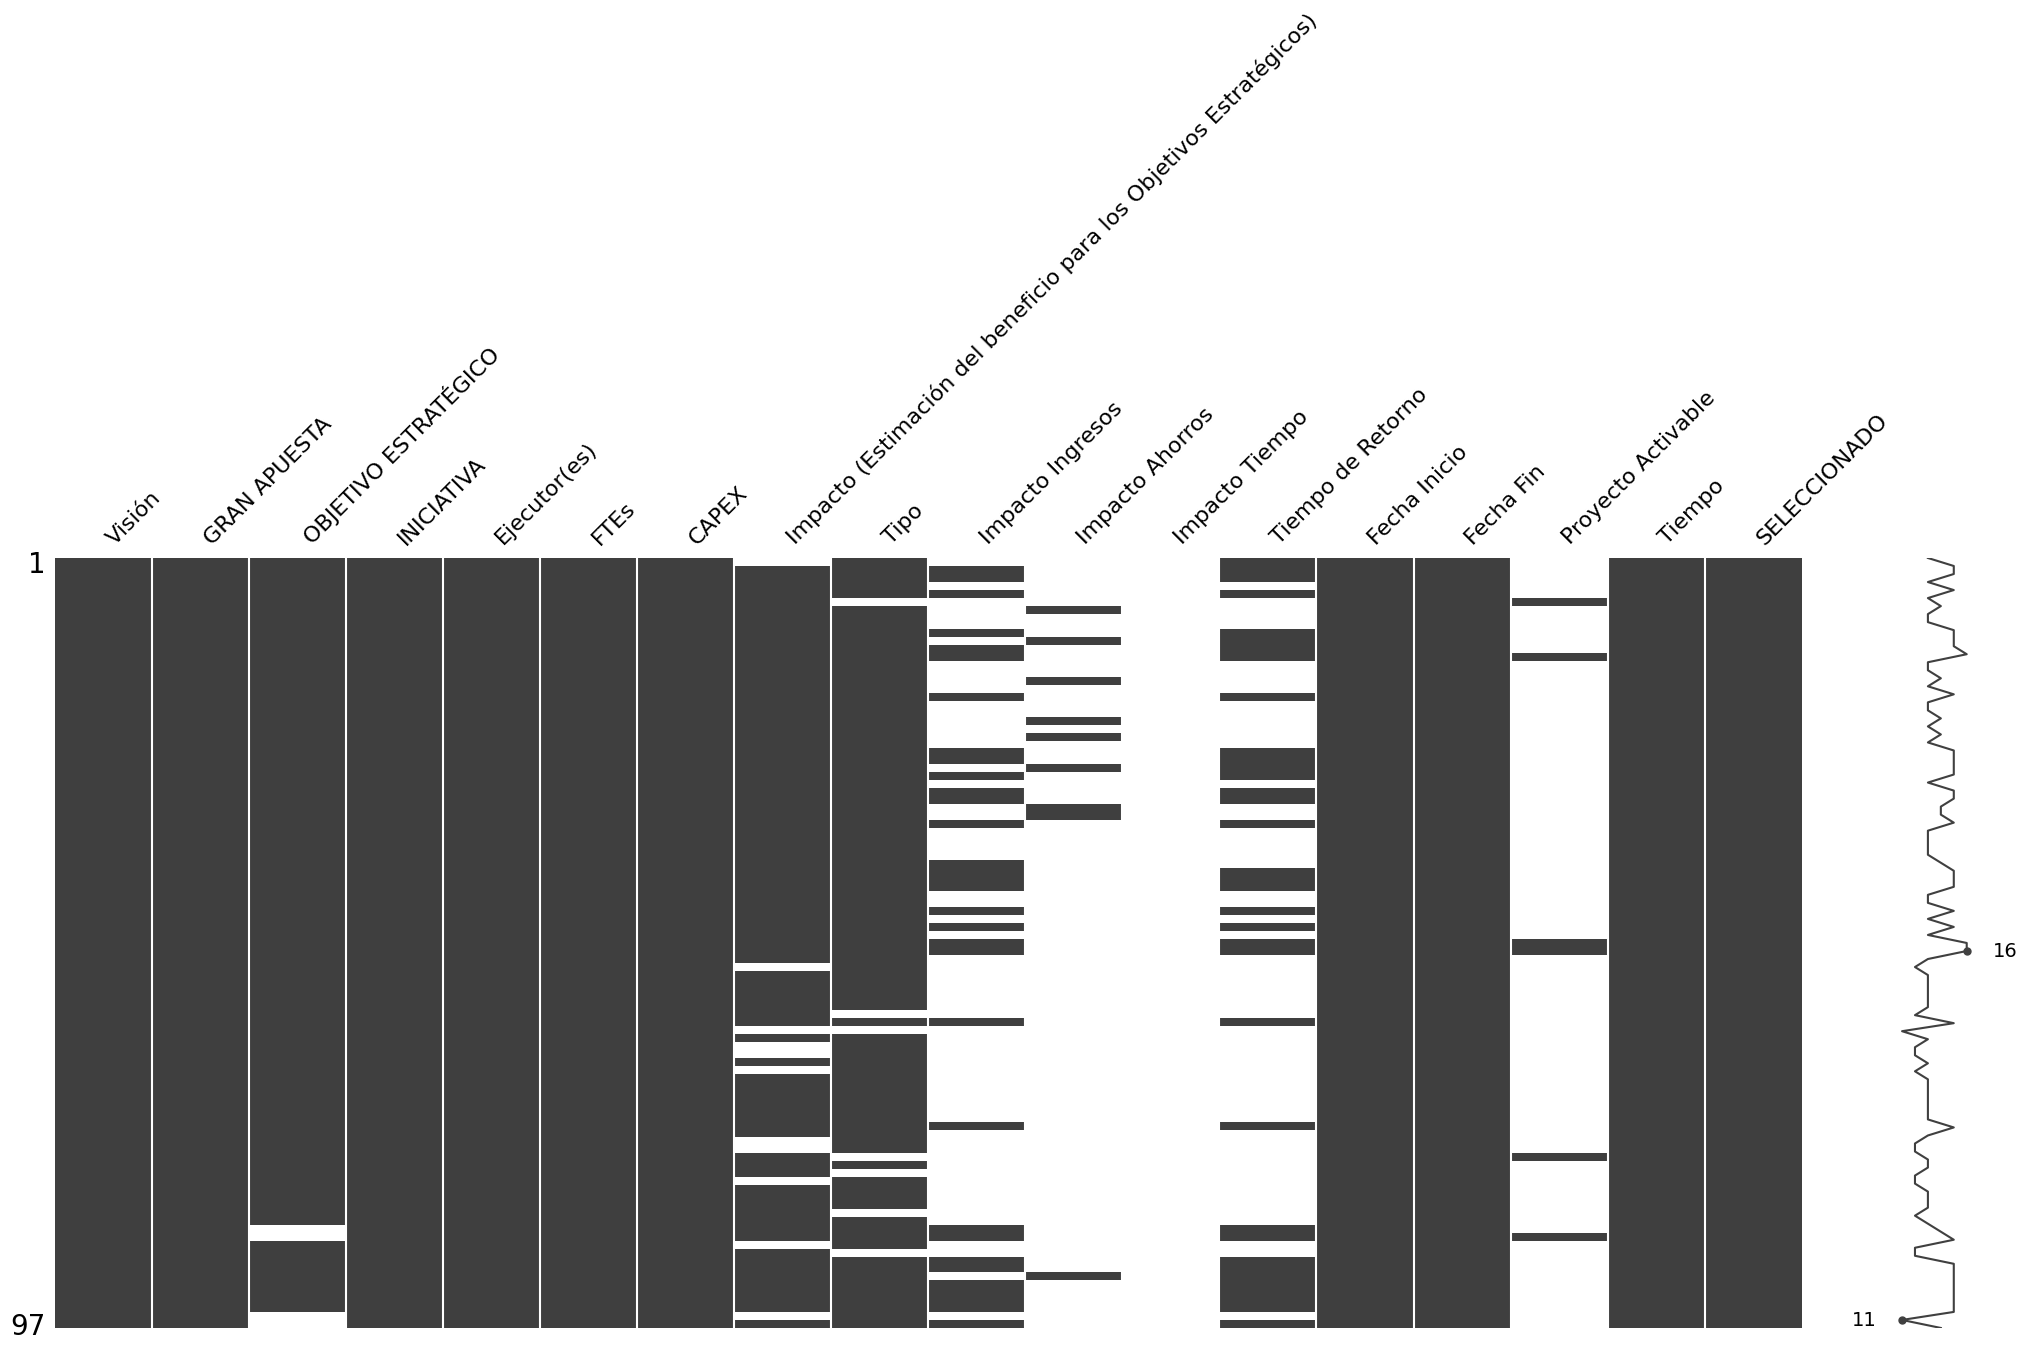

In [ ]:
# Valores faltantes en todo el dataset
msno.matrix(df)

<Axes: >

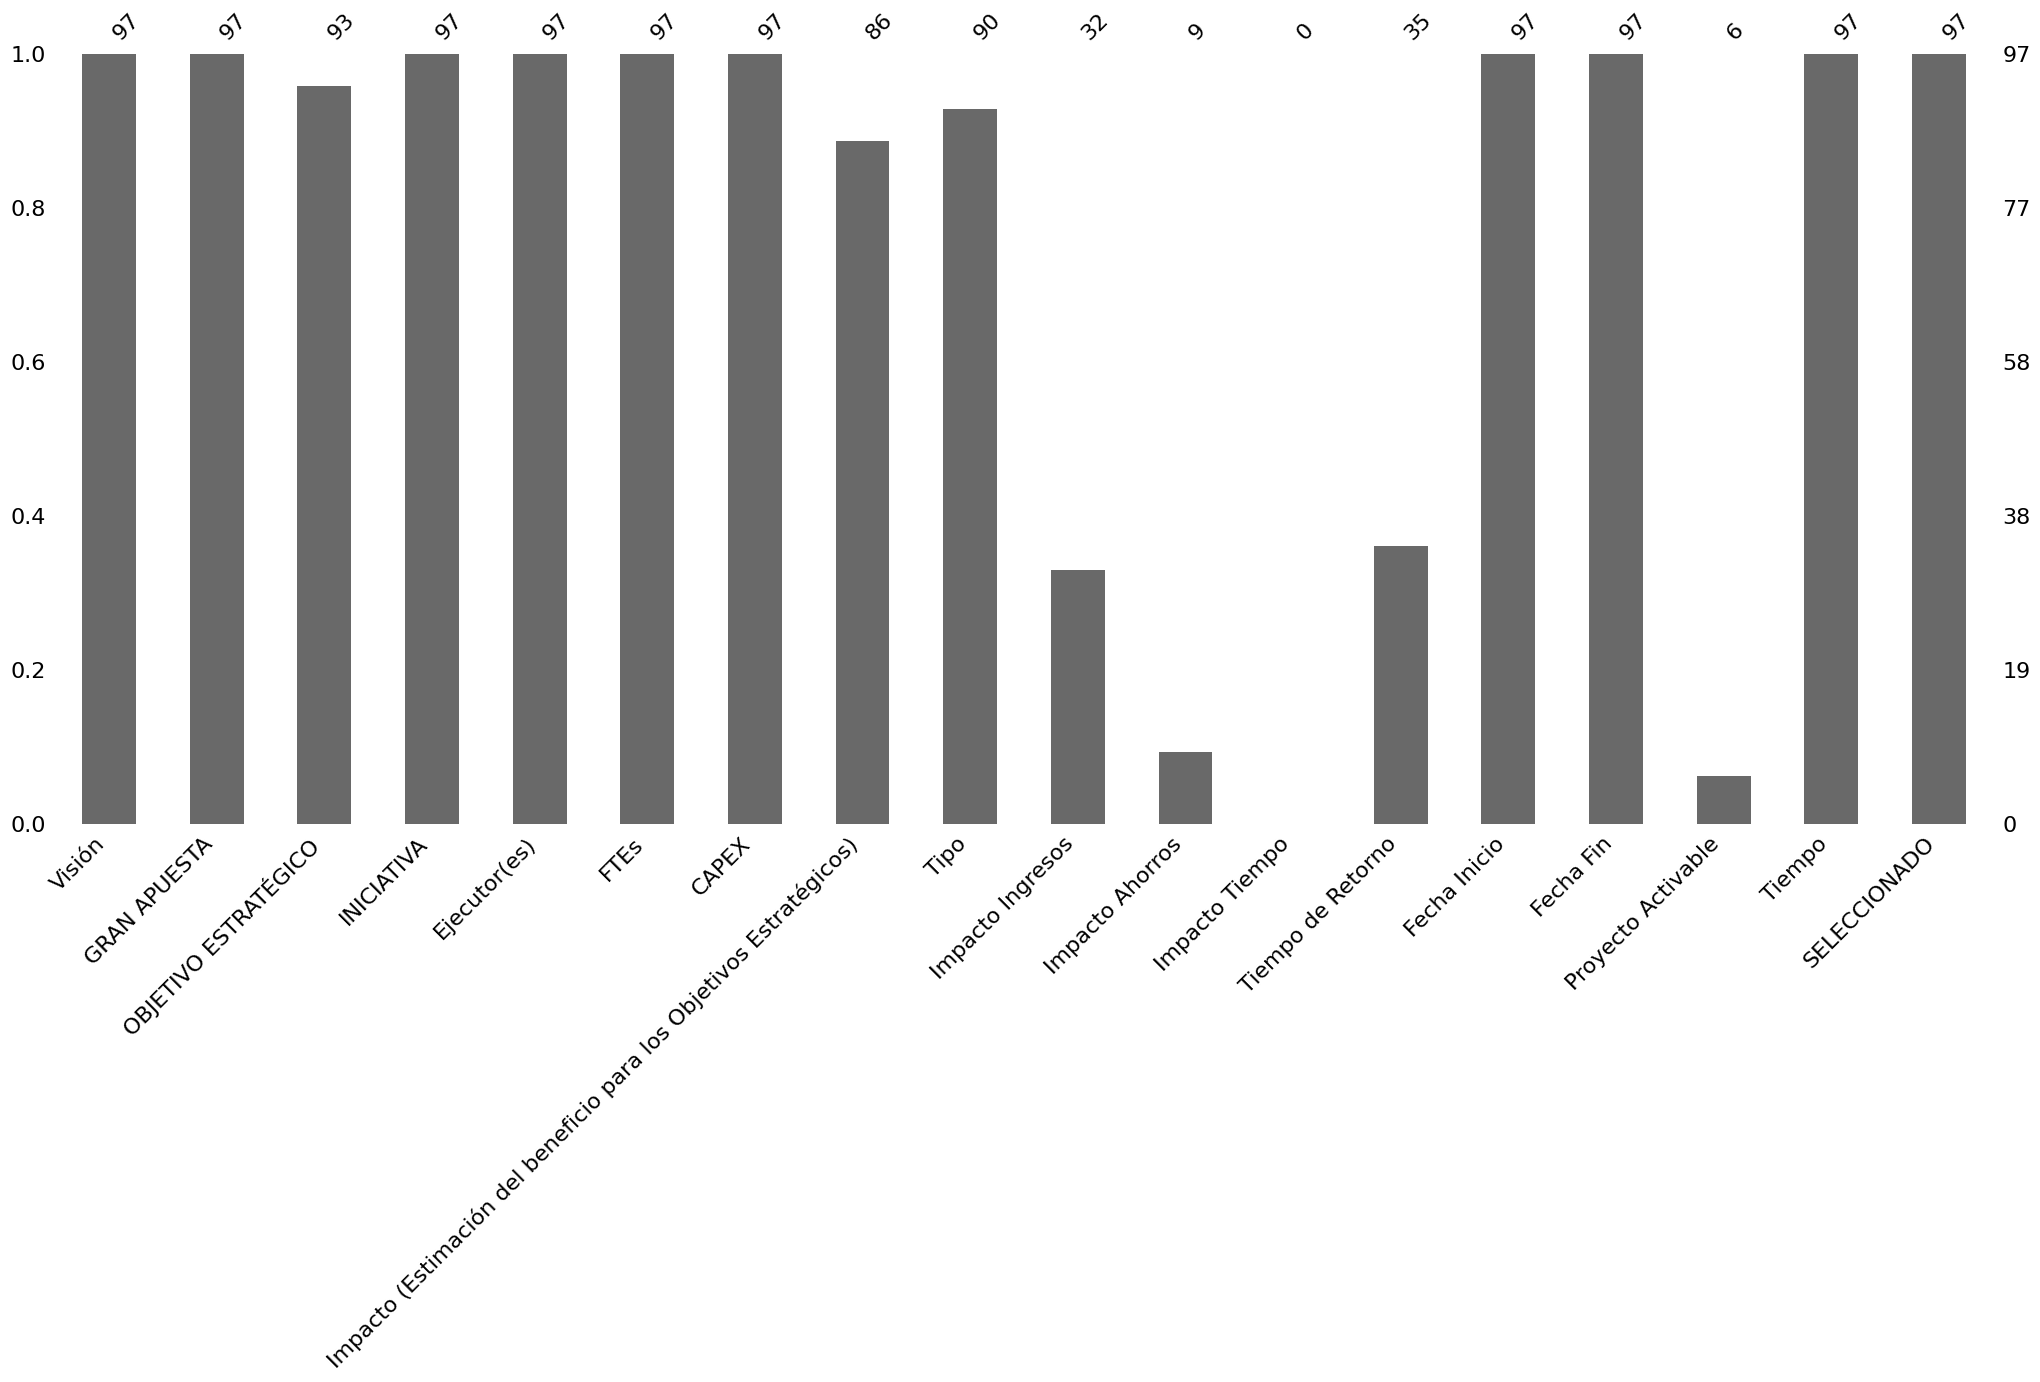

In [ ]:
# Valores faltantes por variables
msno.bar(df)

Los gráficos previos permiten determinar que algunas variable como el impacto, si un proyecto es activable y los tiempos de retorno son los que más problemas tienen por lo que se procederá más adelante a corregir

## **Descriptivos**
En este punto, se procede a realizar un análisis visual de las distintas variables considerando caracteristicas estadisticas como su correlación, atípicos y relaciones

<Axes: >

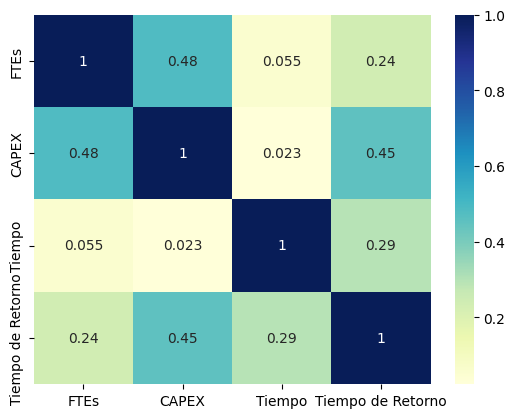

In [ ]:
# Correlacion de variables
corr = df[["FTEs","CAPEX","Tiempo","Tiempo de Retorno"]].corr(method='spearman')

sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           cmap="YlGnBu",
           annot=True)


La correlación entre las variables es baja en la mayoria, solo se detecta 0.45 entre CAPEX y Tiempo de Retorno lo que tiene sentido ya que van de la mano en los casos de negocio

<ipython-input-11-7b1ab00f559c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="GRAN APUESTA", y="CAPEX", data=df, palette="RdGy").get_legend()


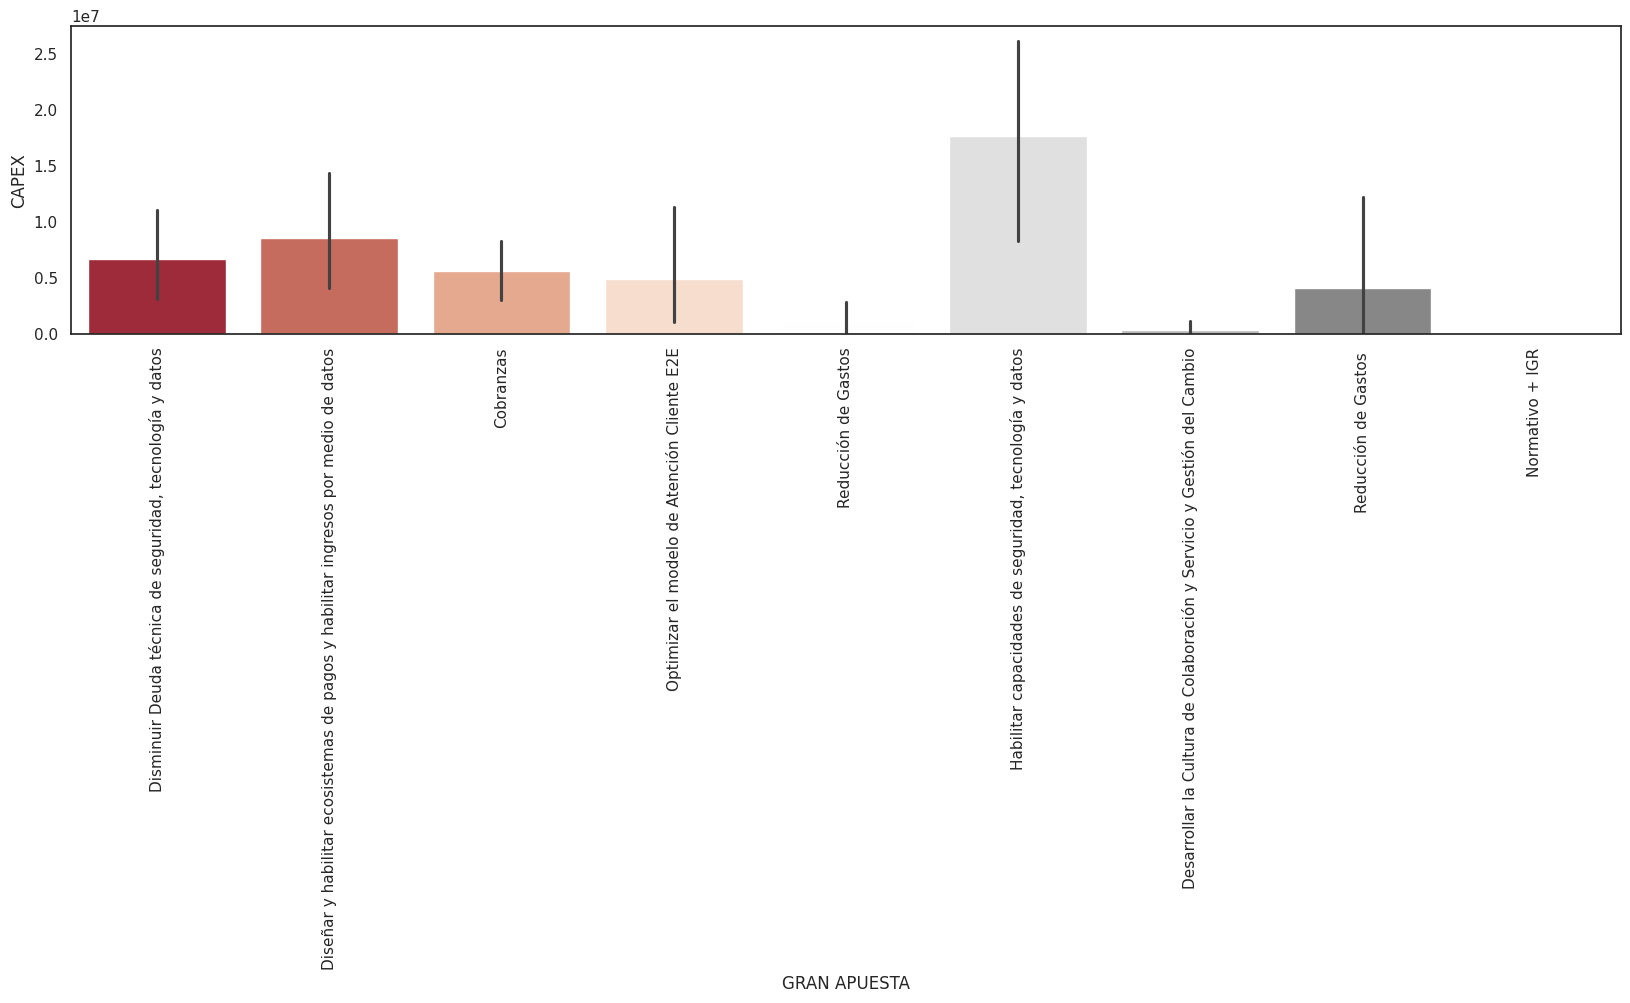

In [ ]:
# CAPEX por Gran Apuesta
plt.figure(figsize=(20,4))
sns.set(style="white",font_scale=1)
sns.barplot(x="GRAN APUESTA", y="CAPEX", data=df, palette="RdGy").get_legend()
plt.xticks(rotation=90)
plt.show()

<ipython-input-12-8b792d9e88a6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="GRAN APUESTA", y="FTEs", data=df, palette="RdGy").get_legend()


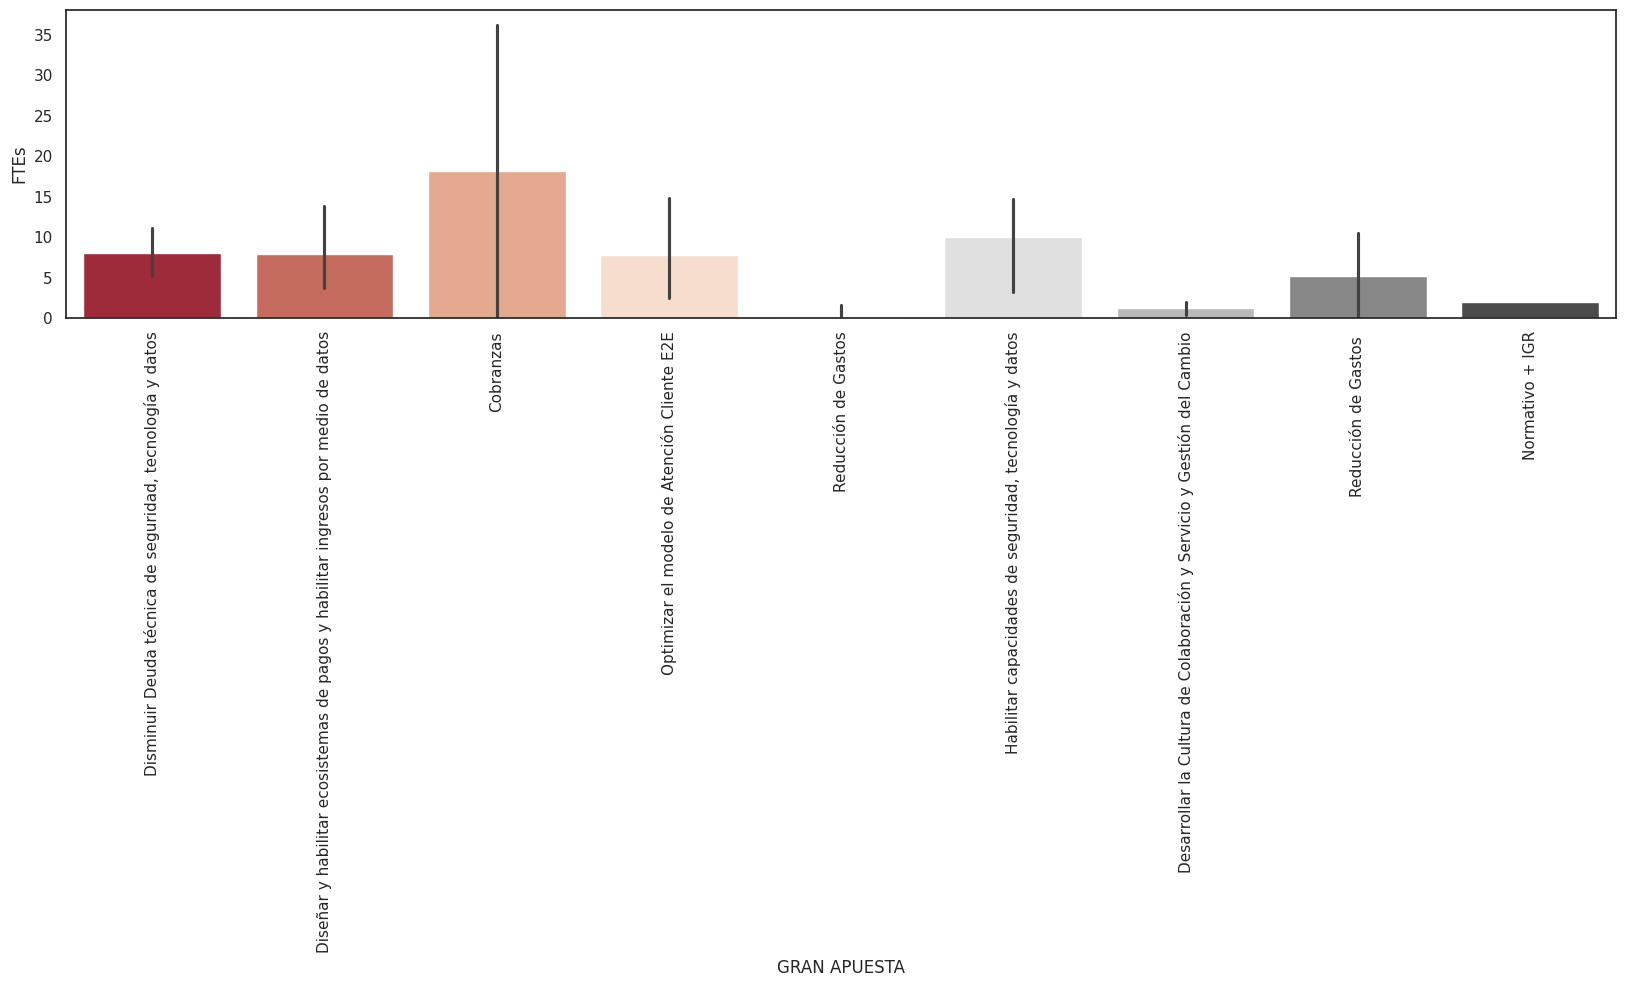

In [ ]:
# FTEs por Gran Apuesta
plt.figure(figsize=(20,4))
sns.set(style="white",font_scale=1)
sns.barplot(x="GRAN APUESTA", y="FTEs", data=df, palette="RdGy").get_legend()
plt.xticks(rotation=90)
plt.show()

Al observar las distintas apuestas se observa que la distribución entre el capex y las manos necesarias es distinta, por un lado el capex es mayor para aquellas iniciativas relacionadas a tecnología y datos mientras que las personas son más requeridas para temas de cobranzas

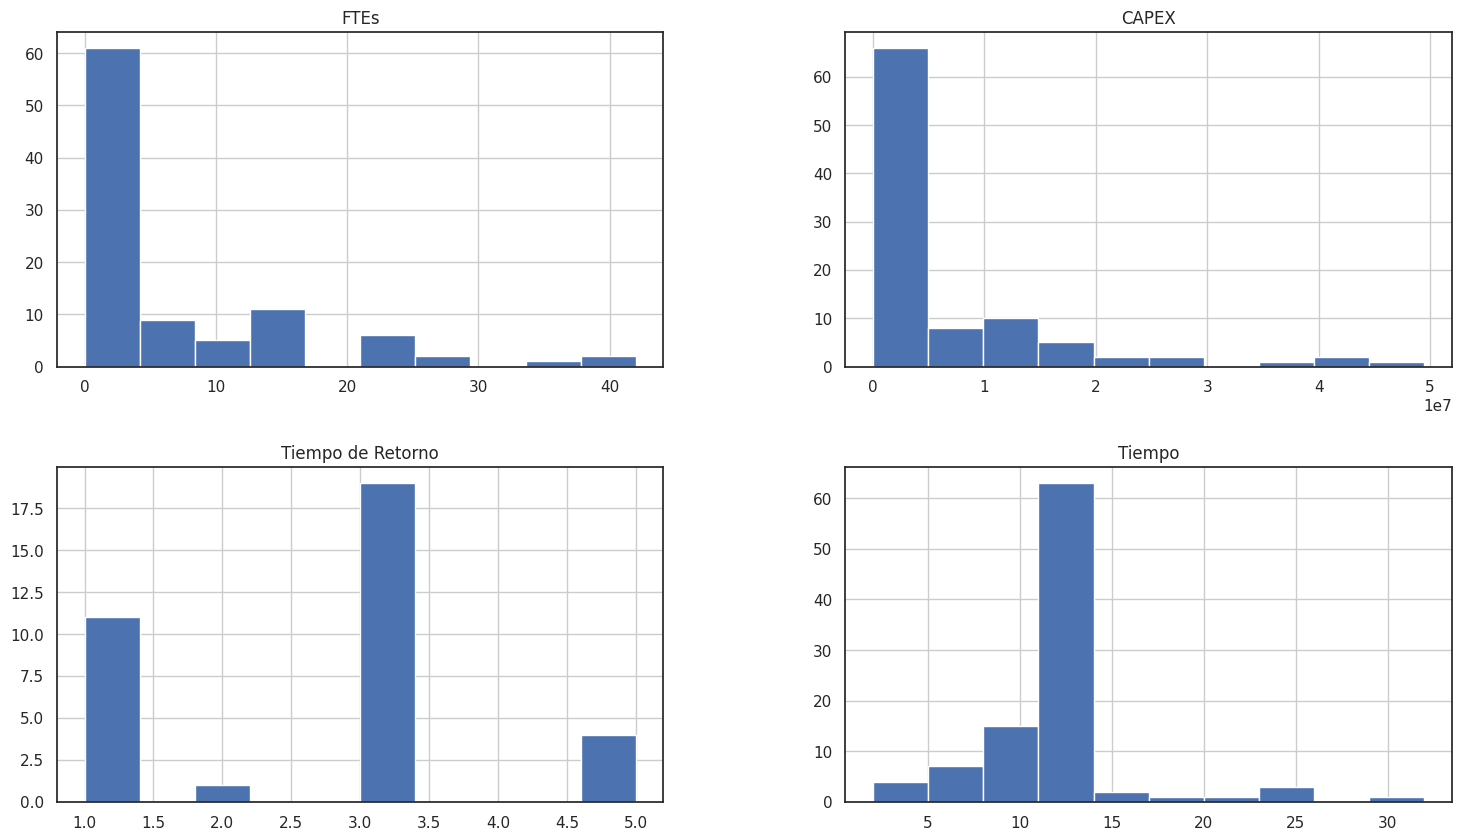

In [ ]:
# Histogramas
df[["FTEs","CAPEX","Tiempo de Retorno","Tiempo"]].hist(figsize=(18, 10))
plt.show()

Al analizar la distribución de las variables numéricas, se observa que no exite un patrón similar entre ellos. Las curvas tienen mayor concentranción en los valores más bajos

<Axes: >

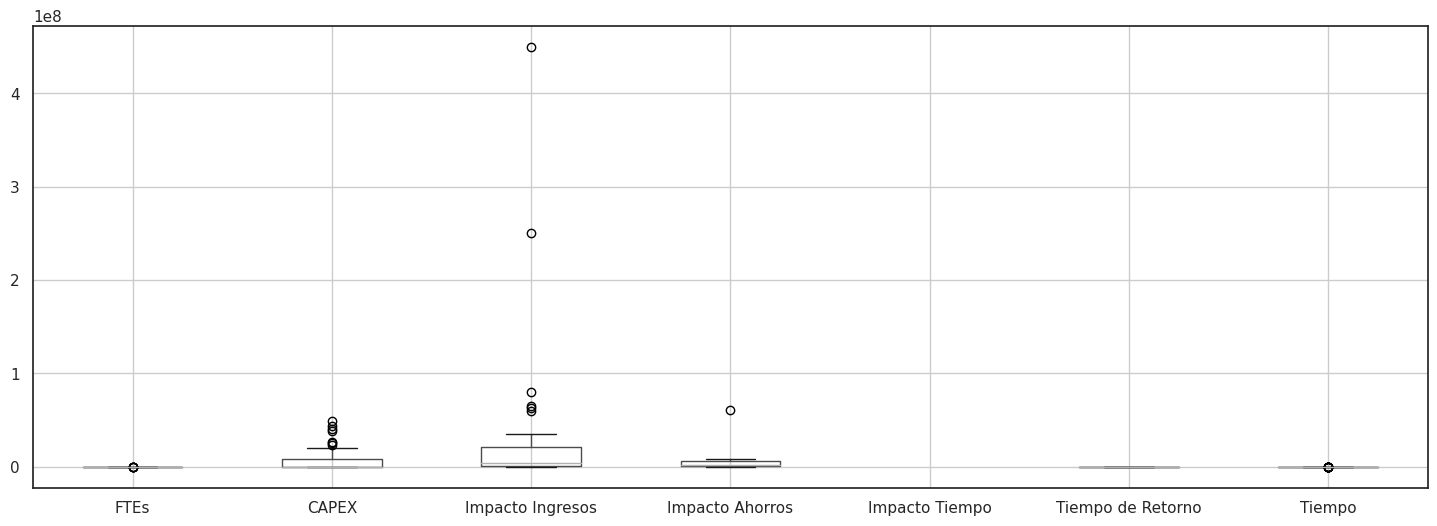

In [ ]:
# Valores Atipicos
df.boxplot(figsize=(18, 6))

Por último, al revisar los valores atípicos, se observa que los impactos son los que cuentan con los valores más dispersos por lo que deben ser considerados posteriormente en los modelos

## Correción y Transformación de Otras Variables

Como último apartado, se proceden a realizar algunos ajustes en variables, como completar información, crear nuevas variables y normalizar algunas

In [ ]:
# Correción de variables vacias - categoricas y numericas
df["Proyecto Activable"] = np.where(df["CAPEX"]>1000000,1,0)
df["Tipo"] = df["Tipo"].fillna("TBD")

# Creación de nuevas variables
df["Impacto Monetario"] = df["Impacto Ingresos"] + df["Impacto Ahorros"]




# Reemplazando Outliers
cols = df.select_dtypes('number').columns  # limits to a (float), b (int) and e (timedelta)
df_sub = df.loc[:, cols]


# z-score filter: z-score < 3
lim = np.abs((df_sub - df_sub.mean()) / df_sub.std(ddof=0)) < 3

# replace outliers with nan
df.loc[:, cols] = df_sub.where(lim, np.nan)

df

,Visión,GRAN APUESTA,OBJETIVO ESTRATÉGICO,INICIATIVA,Ejecutor(es),FTEs,CAPEX,Impacto (Estimación del beneficio para los Objetivos Estratégicos),Tipo,Impacto Ingresos,Impacto Ahorros,Impacto Tiempo,Tiempo de Retorno,Fecha Inicio,Fecha Fin,Proyecto Activable,Tiempo,SELECCIONADO,Impacto Monetario
0,Deuda Técnica,"Disminuir Deuda técnica de seguridad, tecnolog...",Interés Deuda Técnica,INI_01,Varias,6.0,NaN,NaN,SIN IMPACTO,NaN,NaN,NaN,3.0,2024-01-06,2025-01-06,1,12.0,Si,NaN
1,CoE Datos,Diseñar y habilitar ecosistemas de pagos y hab...,Ingreso no Financieros \n(Serv & Com / Ingreso...,INI_02,Empresas (Recursos),9.0,10797840.0,"Ingresos No Financieros 2,8 MM a 3 años.\nAño...",VAN,2800000.0,NaN,NaN,3.0,2024-01-01,2025-01-01,1,12.0,No,NaN
2,CoE Datos,Diseñar y habilitar ecosistemas de pagos y hab...,Ingreso no Financieros \n(Serv & Com / Ingreso...,INI_03,PYMES (Recursos),15.0,10697860.0,VAN: 11 MM a 5 años \nAño 0: 0 MM\nAño 1: 2....,VAN,11000000.0,NaN,NaN,5.0,2024-04-01,2025-01-01,1,9.0,No,NaN
3,Presupuesto de Proyecto,Cobranzas,Ratio Vencida,INI_04,Riesgo de Crédito,0.0,2999400.0,Caso,SIN IMPACTO,NaN,NaN,NaN,NaN,2024-01-06,2025-01-06,1,12.0,No,NaN
4,CoE Datos,Diseñar y habilitar ecosistemas de pagos y hab...,Participación de Mercado \n(Obligaciones con e...,INI_05,CoE Datos & Analítica| Segmentos y Negocios Di...,7.0,2519496.0,"2,5MM Ingresos Operacionales netos \nAño 1: 2...",INGRESO OPERACIONAL,2500000.0,NaN,NaN,3.0,2024-01-01,2024-09-01,1,8.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Operaciones,Reducción de Gastos,Ratio de Eficiencia,INI_93,CEDEX| Tribu Canales,0.5,0.0,Cambio Modelo Pago Comisiones ahorro mensual 6...,VAN,720000.0,NaN,NaN,1.0,2024-01-01,2024-12-01,0,11.0,No,NaN
93,Operaciones,Reducción de Gastos,Ratio de Eficiencia,INI_94,CEDEX| TRIBU RETAIL| COE DATOS| TRIBU PLATAFORMA,4.0,0.0,y 812k Anual en Eficiencia en la Fábrica de Op...,VAN,812000.0,NaN,NaN,1.0,2024-02-01,2024-12-01,0,10.0,Si,NaN
94,Iniciativas Negocio,Reducción de Gastos,Reducción de Gastos,INI_95,Retail| Terceros| Segmentos y negocios Digitales,8.0,0.0,Incremento $80M en pasivos,VAN,80000000.0,NaN,NaN,3.0,2024-03-01,2025-01-06,0,11.0,Si,NaN
95,Despriorizada,Reducción de Gastos,NaN,INI_96,COES| Chapters| VP Legal,0.0,0.0,NaN,REGULATORIO,NaN,NaN,NaN,NaN,2024-01-01,2025-01-06,0,12.0,No,NaN


Con esto queda listo en Análisis Exploratorio para posteriormente avanzar con los distintos modelos del proyecto

# **Avance 2. Ingeniería de características**

**Se aplicarán operaciones comunes para convertir los datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático. El procesamiento puede incluir:**
* Generación de nuevas características
* Discretización o binning
* Codificación (ordinal, one hot,…)
* Escalamiento (normalización, estandarización, min – max,…)
* Transformación (logarítmica, exponencial, raíz cuadrada, Box – Cox, Yeo – Johnson,…)
* Todas las decisiones y técnicas empleadas deben ser justificadas.

**Generación de nuevas características:**

*Diferencia de Tiempo:*

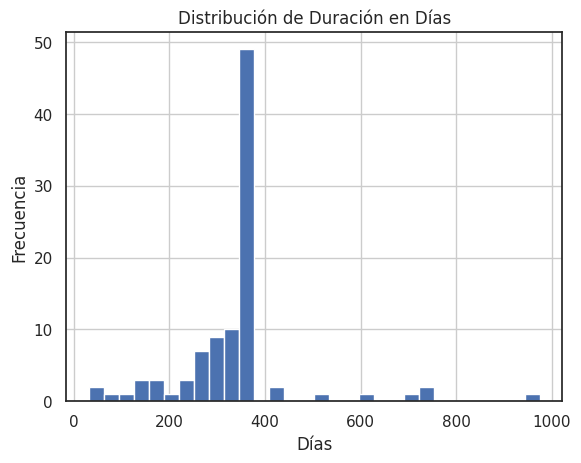

In [ ]:
df['Duracion_Dias'] = (df['Fecha Fin'] - df['Fecha Inicio']).dt.days

# Visualización de la distribución de Duracion_Dias
import matplotlib.pyplot as plt
df['Duracion_Dias'].hist(bins=30)
plt.title('Distribución de Duración en Días')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.show()


**Jutificacion:**
Este código fue seleccionado para el proyecto por su capacidad para transformar y visualizar datos clave sobre la duración de los proyectos, una métrica fundamental en la planificación y gestión empresarial. La extracción de la duración en días entre las fechas de inicio y fin de cada proyecto proporciona una medida cuantitativa esencial para evaluar la eficiencia operativa y la planificación de recursos. El uso de un histograma para visualizar estas duraciones facilita la identificación de patrones y outliers, ofreciendo una comprensión clara y directa de cómo se distribuyen las duraciones de los proyectos. Esta información es crucial para optimizar los procesos, gestionar mejor los recursos, y ajustar las expectativas sobre los plazos de entrega de los proyectos, lo cual, en última instancia, apoya la toma de decisiones estratégicas dentro de la organización.

**La visualización muestra la distribución de la duración de los proyectos en días. Aquí hay varias conclusiones clave que podemos extraer de este histograma:**

1. **Concentración de proyectos:** Una gran cantidad de proyectos tienen una duración que se concentra alrededor de los 250 días aproximadamente. Este pico es muy pronunciado, lo que sugiere que hay una duración estándar común para muchos proyectos.

2. **Rango de duración:** La mayoría de los proyectos tienen una duración de entre aproximadamente 100 a 600 días. Hay muy pocos proyectos que duren menos de 100 días o más de 600 días.

3. **Outliers**: La presencia de barras individuales en duraciones más largas, como alrededor de 800 a 1000 días, sugiere que hay algunos proyectos con duraciones mucho más largas que la mayoría. Estos podrían considerarse como valores atípicos.

4. **Decisiones estratégicas:** Para la planificación y gestión de recursos, es crucial tener en cuenta que la mayoría de los proyectos se completan en un rango de tiempo específico (250 días), lo que puede influir en cómo se programan y se asignan los recursos.

5. **Posible revisión de políticas:** Dado el pico claro y los outliers, podría ser útil revisar si la duración de los proyectos está siendo estimada adecuadamente o si ciertas políticas o prácticas de planificación podrían ajustarse para una distribución más uniforme si eso se alinea mejor con los objetivos estratégicos.

*Costo por día:*

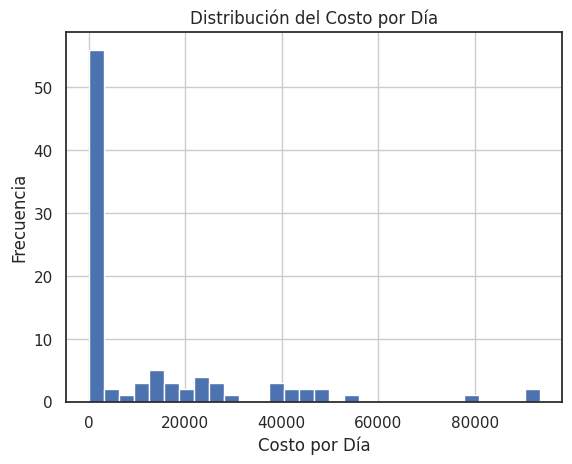

In [ ]:
df['Costo_por_dia'] = df['CAPEX'] / df['Duracion_Dias']

# Visualización del Costo por Día
df['Costo_por_dia'].hist(bins=30)
plt.title('Distribución del Costo por Día')
plt.xlabel('Costo por Día')
plt.ylabel('Frecuencia')
plt.show()


**Justificacion:**
Este código fue elegido para el proyecto con el objetivo de analizar la eficiencia económica de los proyectos, calculando el 'Costo por día' a partir del CAPEX total dividido por la duración total de cada proyecto en días. Este indicador es crucial para monitorear y controlar la asignación financiera en el tiempo, facilitando una visión clara del desembolso diario que implica cada proyecto. Visualizar esta métrica mediante un histograma permite identificar rápidamente la distribución de los costos diarios entre todos los proyectos, destacando tanto los valores típicos como los extremos.

**La visualización muestra la distribución del costo por día para los proyectos. A partir del histograma, se pueden concluir varios puntos importantes:**

1. **Concentración del costo por día:** La mayoría de los proyectos tienen un costo por día que se concentra alrededor del rango más bajo, con un pico muy pronunciado cerca del valor más bajo en el eje horizontal. Esto sugiere que la mayoría de los proyectos tienen un costo diario relativamente bajo.

2. **Distribución de los costos:** Más allá del pico inicial, hay una disminución notable en la frecuencia de proyectos a medida que el costo por día aumenta. Hay algunos proyectos con costos por día significativamente más altos, pero son mucho menos frecuentes.

3. **Valores atípicos**: La presencia de barras en el extremo derecho del gráfico indica que existen proyectos con costos por día excepcionalmente altos. Estos valores atípicos pueden representar proyectos especiales que requieren recursos adicionales, o pueden ser casos donde los costos no están bien controlados.

4. **Implicaciones para la gestión**: Esta distribución sugiere que mientras la mayoría de los proyectos se manejan con costos diarios bajos, es esencial prestar atención a los pocos proyectos que podrían desviarse significativamente del promedio. Estos proyectos podrían necesitar una revisión más detallada para entender las razones detrás de los altos costos diarios.

5. **Planificación financiera:** Conocer la distribución del costo por día ayuda en la planificación financiera y en la asignación de presupuestos. Saber que la mayoría de los proyectos caen dentro de un rango de costo bajo puede facilitar la predictibilidad en los gastos operativos.

# **Discretización o binning**

**Categorización del Tiempo de Retorno:**

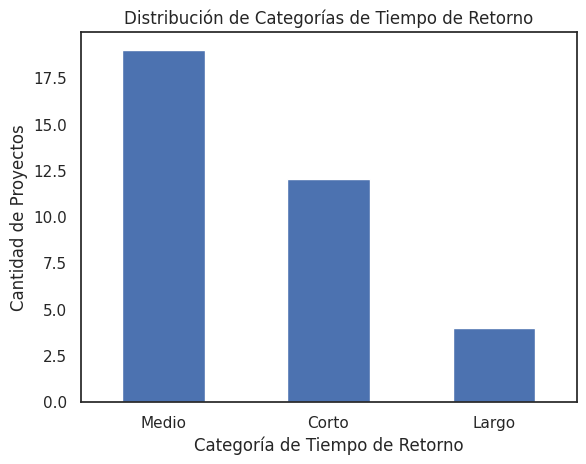

In [ ]:
df['Tiempo_Retorno_Cat'] = pd.qcut(df['Tiempo de Retorno'], q=3, labels=['Corto', 'Medio', 'Largo'])

# Visualización de la distribución de categorías de Tiempo de Retorno
df['Tiempo_Retorno_Cat'].value_counts().plot(kind='bar')
plt.title('Distribución de Categorías de Tiempo de Retorno')
plt.xlabel('Categoría de Tiempo de Retorno')
plt.ylabel('Cantidad de Proyectos')
plt.xticks(rotation=0)
plt.show()


**Justificacion:** Este código fue seleccionado para segmentar y visualizar eficazmente el 'Tiempo de Retorno' de los proyectos en categorías manejables, lo cual es esencial para una gestión estratégica eficiente de proyectos. Utilizando la función qcut de pandas, el tiempo de retorno se clasifica en tres categorías cuantiles: 'Corto', 'Medio' y 'Largo', permitiendo una distribución equitativa de los proyectos en cada categoría. Esta clasificación ayuda a los gestores a comprender rápidamente la proporción de proyectos que generan retornos en diferentes periodos, facilitando la identificación de patrones o tendencias en la efectividad de la inversión.

**La visualización de la distribución de las categorías de tiempo de retorno muestra las siguientes características:**

1. **Desbalance en la distribución:** La mayoría de los proyectos están clasificados en la categoría de tiempo de retorno "Medio", seguido por "Corto", y hay significativamente menos proyectos en la categoría "Largo". Este desbalance puede indicar que la mayoría de los proyectos tienen plazos que son considerados medianamente adecuados según los estándares del negocio, mientras que muy pocos proyectos tienen plazos considerados largos.

2. **Implicaciones operativas y estratégicas:**

 * **Gestión de expectativas:** El hecho de que la mayoría de los proyectos estén en la categoría "Medio" podría indicar que las estimaciones de tiempo son realistas y alineadas con las capacidades operativas y los recursos disponibles.
 * **Revisión de políticas para proyectos largos**: La baja cantidad de proyectos en la categoría "Largo" sugiere que es raro que los proyectos se extiendan más allá de lo típicamente esperado. Esto podría ser una señal positiva de eficiencia, pero también podría indicar que los proyectos con extensas duraciones necesitan revisión para determinar si los largos tiempos de retorno están justificados o si podrían optimizarse.
 * **Focalización en proyectos cortos:** Los proyectos en la categoría "Corto" son menos frecuentes que los medianos pero más comunes que los largos, lo cual podría sugerir que hay oportunidades para acelerar algunos proyectos sin sacrificar la calidad o el resultado.

3. **Planificación y asignación de recursos:** Dado que la mayoría de los proyectos están en la categoría "Medio", los recursos pueden planificarse con esta duración como la más común, asegurando que los proyectos con tiempos de retorno cortos o largos reciban atención especial para entender sus necesidades específicas.
4. **Análisis de la definición de categorías:**Sería útil revisar cómo se han definido las categorías para asegurarse de que reflejan adecuadamente los objetivos y expectativas del negocio. Por ejemplo, ajustar los límites de las categorías podría proporcionar una distribución más equitativa o más alineada con los estándares operativos del negocio.

# **Codificación (ordinal, one hot,…)**

**Codificación One-Hot para Tipos de Impacto:**

In [ ]:
df = pd.get_dummies(df, columns=['Tipo'], prefix='Tipo')

# Visualización de las primeras filas para verificar la codificación
print(df.head())


                    Visión                                       GRAN APUESTA  \
0            Deuda Técnica  Disminuir Deuda técnica de seguridad, tecnolog...   
1                CoE Datos  Diseñar y habilitar ecosistemas de pagos y hab...   
2                CoE Datos  Diseñar y habilitar ecosistemas de pagos y hab...   
3  Presupuesto de Proyecto                                          Cobranzas   
4                CoE Datos  Diseñar y habilitar ecosistemas de pagos y hab...   

                                OBJETIVO ESTRATÉGICO INICIATIVA  \
0                              Interés Deuda Técnica     INI_01   
1  Ingreso no Financieros \n(Serv & Com / Ingreso...     INI_02   
2  Ingreso no Financieros \n(Serv & Com / Ingreso...     INI_03   
3                                      Ratio Vencida     INI_04   
4  Participación de Mercado \n(Obligaciones con e...     INI_05   

                                        Ejecutor(es)  FTEs       CAPEX  \
0                                   

**Justificacion:** Se implementó para convertir las variables categóricas 'Tipo' en una forma numérica adecuada para análisis estadísticos y modelos predictivos, usando codificación one-hot. Al transformar cada categoría de 'Tipo' en una columna binaria distinta, se elimina cualquier sesgo ordinal que podría malinterpretarse por modelos que asumen una relación numérica lineal.

**La visualización del DataFrame después de aplicar codificación one-hot muestra cómo se han transformado ciertas variables categóricas en columnas binarias:**

1. **Transformación de Variables Categóricas:** Las columnas que originalmente contenían categorías como "Tipo_DEUDA TECNICA", "Tipo_INGRESO OPERACIONAL", "Tipo_PASIVO", entre otros, se han convertido en múltiples columnas binarias. Cada una de estas nuevas columnas representa una categoría y contiene valores booleanos (True o False) que indican si el registro pertenece a esa categoría.

2. **Facilitación del Proceso de Modelado:** Al transformar las variables categóricas en formatos binarios, se facilita su uso en algoritmos de aprendizaje automático que requieren entradas numéricas. Esto es particularmente útil para modelos que no manejan directamente variables categóricas.

3. **Prevención de Sesgo de Orden:** La codificación one-hot evita el sesgo que podría introducirse al asignar números arbitrarios a categorías (como en la codificación ordinal), ya que no se implica ningún orden o peso entre las categorías.

4. **Aumento en la Dimensionalidad:** Una desventaja potencial de la codificación one-hot es que puede aumentar significativamente la cantidad de características (dimensionalidad) del dataset, especialmente si las variables categóricas tienen muchas categorías únicas. Esto puede llevar a problemas de dimensionalidad o a un aumento en la complejidad computacional.

# **Escalamiento (normalización, estandarización, min – max,…)**

**Estandarización de "CAPEX" y "FTEs":**

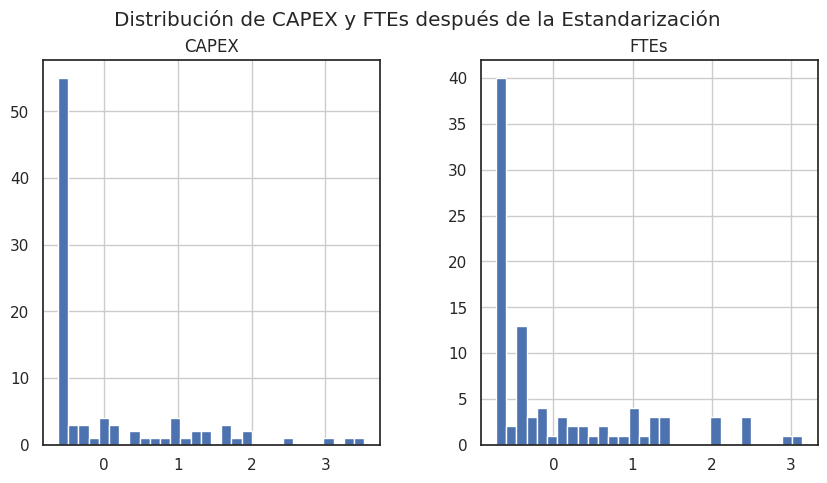

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CAPEX', 'FTEs']] = scaler.fit_transform(df[['CAPEX', 'FTEs']])

# Visualización de las características escaladas
df[['CAPEX', 'FTEs']].hist(bins=30, figsize=(10, 5))
plt.suptitle('Distribución de CAPEX y FTEs después de la Estandarización')
plt.show()


**Justificacion:** Este código aplica la estandarización a las columnas 'CAPEX' y 'FTEs' usando StandardScaler de scikit-learn, una técnica crucial para asegurar que estas variables tengan media cero y desviación estándar uno. La estandarización es esencial en el preprocesamiento de datos para modelos de aprendizaje automático que son sensibles a la escala de las características, como SVM o k-nearest neighbors.

**La visualización de la distribución de "CAPEX" y "FTEs" después de la estandarización proporciona información relevante sobre cómo estos valores se distribuyen tras ajustarlos a una escala común con media 0 y desviación estándar 1.**

1. **Observaciones de CAPEX**
 * **Concentración de valores cerca de cero:** La mayoría de los valores de CAPEX se concentran cerca del valor estandarizado de 0, lo que indica que estos valores están muy cerca de la media del dataset.
 * **Pocos valores extremos:** Hay un número muy pequeño de proyectos con valores estandarizados de CAPEX que se extienden más allá de 1 y hasta cerca de 3 en la escala estandarizada. Esto sugiere que algunos proyectos tienen costos considerablemente más altos en comparación con la media.
2. **Observaciones de FTEs**
 * **Distribución desequilibrada:** Al igual que con CAPEX, la mayoría de los valores de FTEs se agrupan cerca de cero, pero hay más variabilidad en los datos comparado con CAPEX, como se refleja en las barras más dispersas hacia valores más altos.
 * **Presencia de valores extremos:** Similar a CAPEX, también hay unos pocos proyectos con valores estandarizados de FTEs bastante altos, algunos extendiéndose hasta casi 3.
3. **Conclusiones Generales**
 * **Desviaciones de la media:** La estandarización ha revelado qué tan lejos están los valores de CAPEX y FTEs de la media en términos de desviaciones estándar. La mayoría de los proyectos requieren un número de FTEs y presupuestos de CAPEX que son cercanos a la media del conjunto de datos.
 * **Necesidad de revisión en proyectos extremos:** Los proyectos que muestran valores extremadamente altos de CAPEX o FTEs podrían requerir una revisión especial para entender las razones detrás de estos costos elevados, ya que pueden estar asociados con riesgos financieros o de gestión de recursos.

# **Transformación (logarítmica, exponencial, raíz cuadrada, Box – Cox, Yeo – Johnson,…)**

**Transformación Logarítmica de "CAPEX":**

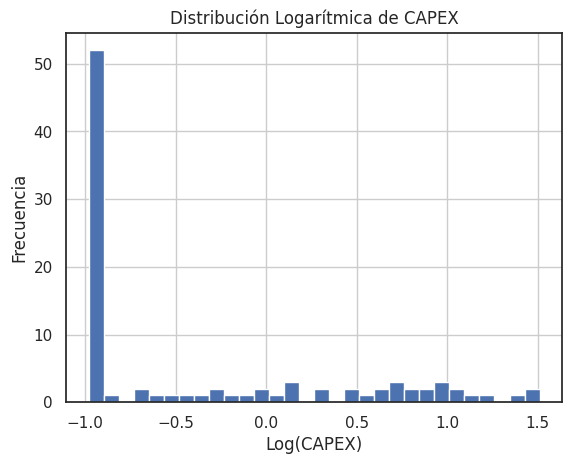

In [ ]:
df['CAPEX_log'] = np.log1p(df['CAPEX'])

# Visualización de la distribución transformada de CAPEX
df['CAPEX_log'].hist(bins=30)
plt.title('Distribución Logarítmica de CAPEX')
plt.xlabel('Log(CAPEX)')
plt.ylabel('Frecuencia')
plt.show()


**Justificacion:** Este código implementa la transformación logarítmica de la columna 'CAPEX' usando np.log1p, que es efectiva para estabilizar la varianza y reducir la asimetría en los datos financieros que típicamente exhiben una distribución sesgada hacia la derecha. Al transformar 'CAPEX' logarítmicamente, se mejora la normalidad de los datos, lo cual es crucial para técnicas de modelado que asumen normalidad en las entradas.

**La visualización de la distribución logarítmica de "CAPEX" muestra varios aspectos importantes acerca de cómo se comportan los datos tras aplicar una transformación logarítmica.**

1. **Concentración de Valores:** La mayoría de los valores de CAPEX, una vez transformados logarítmicamente, se concentran fuertemente cerca de cero y justo por debajo de cero. Esto sugiere que la mayoría de los proyectos tienen valores de CAPEX relativamente bajos cuando se considera en una escala logarítmica.

2. **Distribución de los Valores:** Hay un número significativo de barras a la izquierda del cero, mostrando que hay varios proyectos con valores muy bajos de CAPEX. La distribución se dispersa hacia la derecha, indicando que hay menos proyectos con valores de CAPEX exponencialmente más altos.

3. **Valores Negativos en Logaritmo**: La presencia de valores negativos en la transformación logarítmica indica valores de CAPEX menores a 1 en el dataset original. Esto es característico de la función logarítmica, donde log(x) < 0 si 0 < x < 1.

4. **Presencia de Valores Atípicos:** Aunque la mayoría de los proyectos se agrupan en torno a los valores menores, se observan algunos proyectos hacia el extremo derecho del gráfico (log(CAPEX) > 1), lo que indica que estos proyectos tienen CAPEX considerablemente más altos en comparación con el resto.

**Además, se utilizarán métodos de filtrado para la selección de características y técnicas de extracción de características, permitiendo reducir los requerimientos de almacenamiento, la complejidad del modelo y el tiempo de entrenamiento. Los ejemplos siguientes son ilustrativos, pero no exhaustivos, de lo que se podría aplicar:**
* Umbral de varianza
* Correlación
* Chi-cuadrado
* ANOVA
* Análisis de componentes principales (PCA)
* Análisis factorial (FA)
 * Es necesario fundamentar los métodos ejecutados.

**Para optimizar el análisis y modelado basado en el dataset y los avances revisados, aplicaremos algunas técnicas de selección y extracción de características. Esto incluirá el uso de umbral de varianza para eliminar características con poca varianza, correlación para entender interrelaciones, y Análisis de Componentes Principales (PCA) para la reducción de la dimensionalidad. **

# Umbral de Varianza

In [ ]:
from sklearn.feature_selection import VarianceThreshold


# Seleccionar solo las columnas numéricas para el VarianceThreshold
df_numeric = df.select_dtypes(include=[np.number])

# Aplicar VarianceThreshold
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
df_reduced = selector.fit_transform(df_numeric)

# Verificar el número de características antes y después
print("Características originales:", df_numeric.shape[1])
print("Características después de umbral de varianza:", df_reduced.shape[1])



Características originales: 14
Características después de umbral de varianza: 12


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_variance_threshold.py:111: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


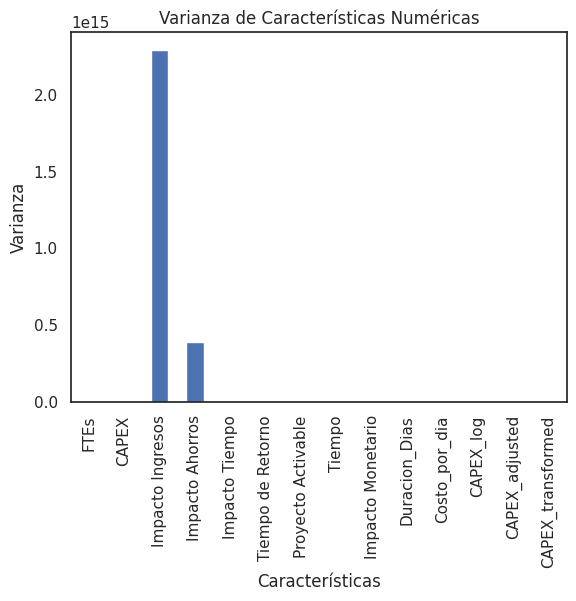

In [ ]:
import matplotlib.pyplot as plt

# Calcular la varianza de cada característica
variances = df_numeric.var()

# Crear un gráfico de barras para mostrar la varianza por característica
variances.plot(kind='bar')
plt.title('Varianza de Características Numéricas')
plt.xlabel('Características')
plt.ylabel('Varianza')
plt.show()


**Justificación:** Selección de características basada en la varianza es importante porque las características que no varían mucho dentro del dataset generalmente no aportan información útil para los modelos predictivos. Al eliminar estas características, reducimos la complejidad del modelo, lo que puede ayudar a prevenir el sobreajuste y mejorar el tiempo de entrenamiento y la eficiencia del modelo en general.

1. **Distribución desigual de la varianza:** La varianza entre las características numéricas del dataset es extremadamente desigual. La característica 'FTEs' tiene una varianza significativamente mayor que cualquier otra característica, dominando la escala del gráfico con una varianza cercana a 10^15, mientras que las otras características, como 'CAPEX', tienen varianzas mucho menores.
2. **Impacto de 'FTEs' en la escala:** La alta varianza de 'FTEs' podría estar afectando la escala del gráfico y, potencialmente, la eficacia del filtro de varianza aplicado, ya que las características con varianzas menores podrían no ser evaluadas adecuadamente en comparación.

# **Correlación**

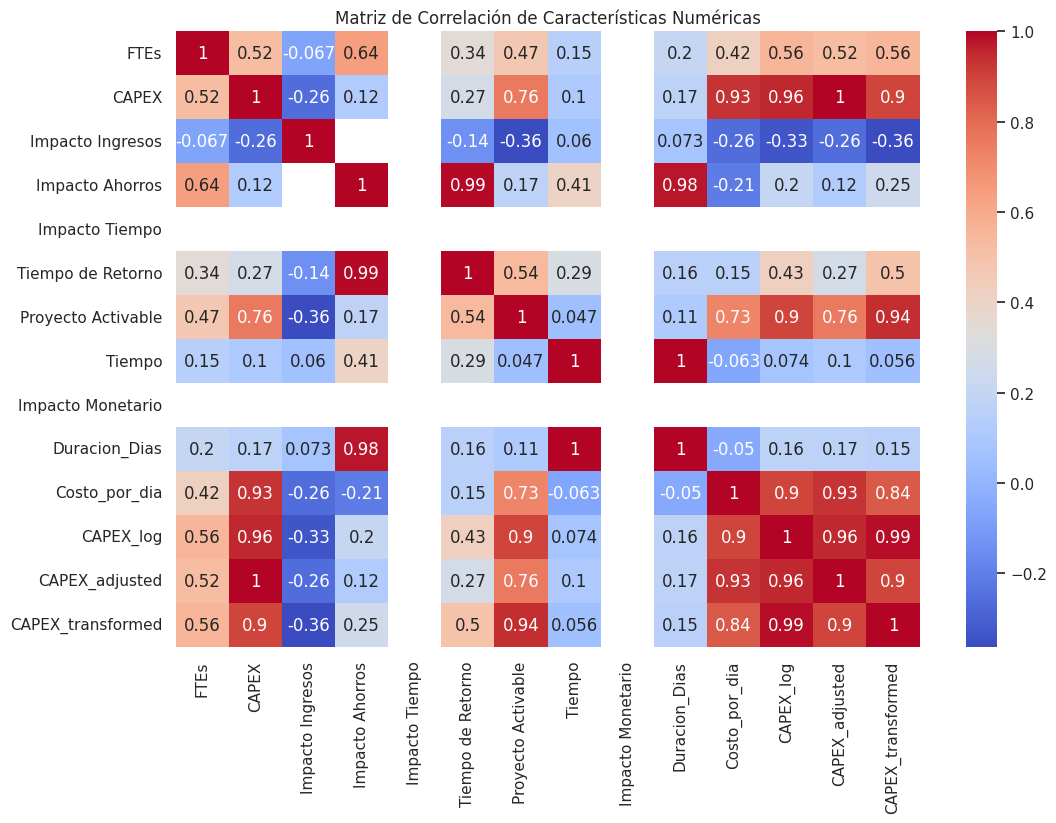

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas para calcular la correlación
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Cálculo de la matriz de correlación para datos numéricos
corr_matrix = df_numeric.corr()

# Configurar el tamaño de la figura antes de la visualización
plt.figure(figsize=(12, 8))  # Tamaño más grande para mejor visualización

# Visualizar la matriz de correlación con heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación de Características Numéricas')
plt.show()


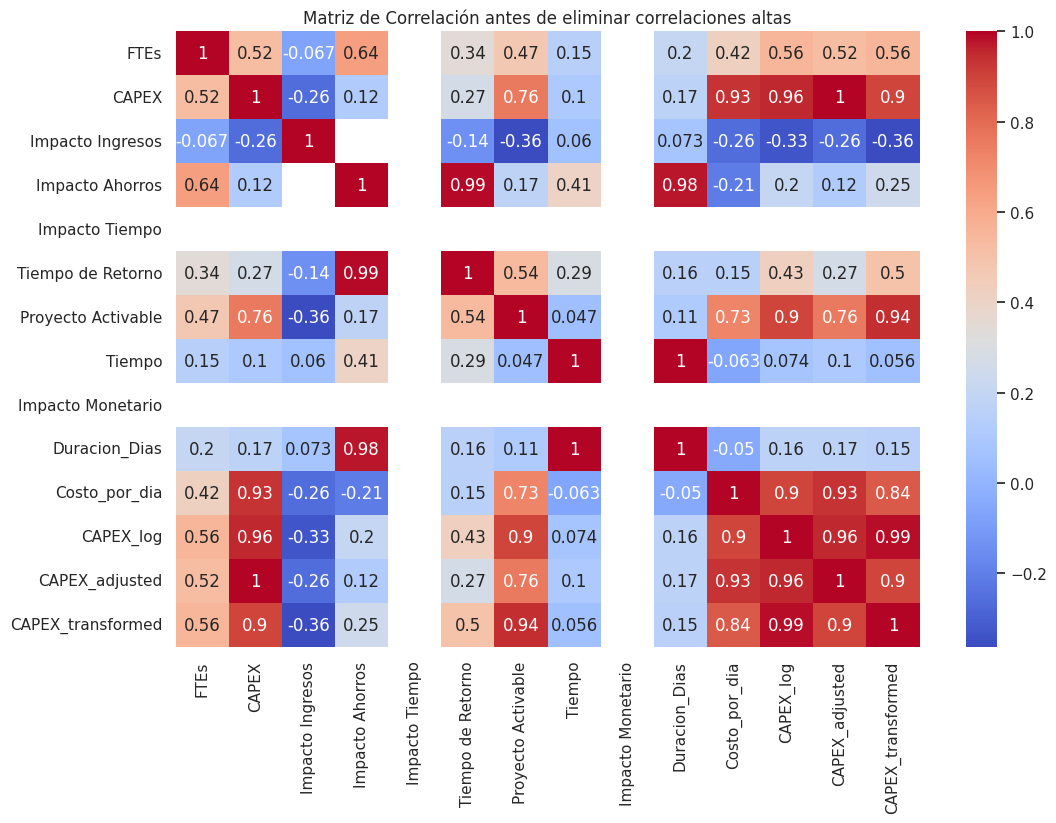

Columnas eliminadas: {'CAPEX_log', 'Duracion_Dias', 'Costo_por_dia', 'Tiempo de Retorno', 'CAPEX_adjusted', 'CAPEX_transformed'}
Forma del DataFrame después de eliminar columnas altamente correlacionadas: (97, 8)


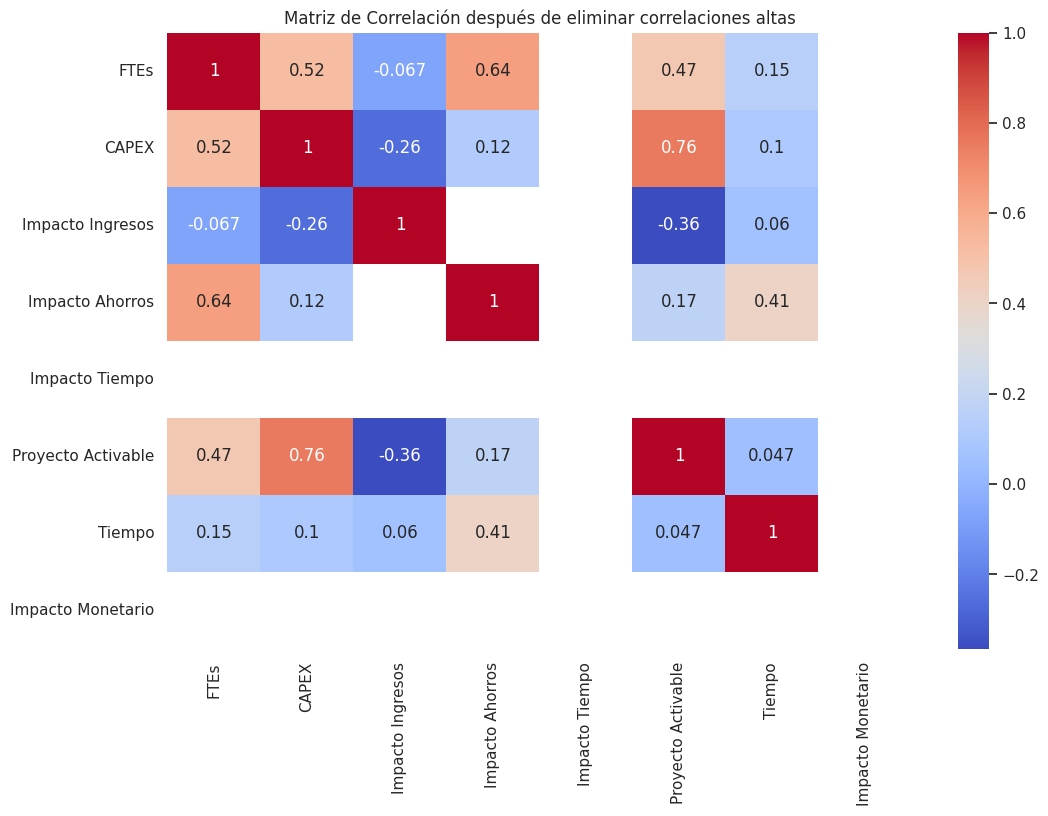

In [ ]:

corr_matrix = df_numeric.corr()

# Configurar el tamaño de la figura para una visualización clara
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación antes de eliminar correlaciones altas')
plt.show()

# Encuentra índices de columnas altamente correlacionadas
to_drop = set()  # Un conjunto para almacenar los índices de las columnas a eliminar
threshold = 0.8  # Define un umbral de correlación alto

# Itera sobre los valores de correlación
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) >= threshold:  # Si la correlación es alta
            # Añadir uno de los dos índices de columna al conjunto to_drop
            to_drop.add(corr_matrix.columns[j])

# Elimina las columnas altamente correlacionadas
df_reduced = df_numeric.drop(columns=to_drop)

# Muestra el resultado
print("Columnas eliminadas:", to_drop)
print("Forma del DataFrame después de eliminar columnas altamente correlacionadas:", df_reduced.shape)

# Visualiza la nueva matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df_reduced.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación después de eliminar correlaciones altas')
plt.show()


**Justificacion:** Permite identificar y eliminar características que están fuertemente correlacionadas con otras, lo cual simplifica el modelo sin perder información significativa. Reducir la multicolinealidad mejora la estabilidad y la interpretabilidad de los modelos estadísticos y predictivos, evitando problemas como la inflación de la varianza en los coeficientes estimados en regresiones.

**Observaciones de la Matriz de Correlación Antes de la Eliminación:**
* **Alta correlación entre múltiples características:** Varios pares de características muestran una correlación extremadamente alta (valores cercanos a 1 o -1). Por ejemplo, las transformaciones de CAPEX como CAPEX_log, CAPEX_adjusted, y CAPEX_transformed están altamente correlacionadas entre sí y con CAPEX original.
* **Redundancia de características:** Características como Duracion_Dias, Costo_por_dia, y Tiempo de Retorno también muestran una alta correlación con otras variables. Esto indica redundancia, lo cual puede llevar a problemas de multicolinealidad en modelos de aprendizaje automático.

**Observaciones de la Matriz de Correlación Después de la Eliminación:**
* **Reducción significativa en la correlación:** La matriz después muestra una reducción notable en las correlaciones altas, lo cual es un indicativo de que el conjunto de datos ahora está más adecuado para análisis predictivos y estadísticos sin el riesgo de multicolinealidad.
* **Menor número de características:** La matriz es claramente más pequeña, indicando que se han eliminado las características redundantes, lo que simplifica los modelos y puede mejorar la interpretación y el rendimiento de los algoritmos de aprendizaje automático.
* **Análisis de las Columnas Eliminadas:**
Las columnas eliminadas incluyen transformaciones y derivados de CAPEX, además de otras características con alta dependencia lineal con sus contrapartes. Esto es positivo ya que simplifica el modelo al eliminar la información redundante y facilita la gestión del overfitting.
La eliminación de estas características debería ayudar a que los modelos resultantes sean más generales y menos propensos a aprender ruido de los datos.